Exercise 1: Get WDI data on patent applications by residents and non-residents in each country. Create a new variable that shows the total patents for each country.

In [4]:
import pandas as pd
import numpy as np
from pandas_datareader import data, wb

In [5]:
wbcountries = wb.get_countries()

In [6]:
wbcountries = wbcountries.loc[wbcountries.region.isin(['Aggregates'])==False].reset_index(drop=True)
wbcountries['name'] = wbcountries.name.str.strip()
wbcountries['incomeLevel'] = wbcountries['incomeLevel'].str.title()
wbcountries.loc[wbcountries.iso3c=='VEN', 'incomeLevel'] = 'Upper Middle Income'

In [7]:
wbcountries = wb.get_countries()
wbcountries = wbcountries.loc[wbcountries.region.isin(['Aggregates'])==False].reset_index(drop=True)
wbcountries['name'] = wbcountries.name.str.strip()
wbcountries['incomeLevel'] = wbcountries['incomeLevel'].str.title()
wbcountries.loc[wbcountries.iso3c=='VEN', 'incomeLevel'] = 'Upper Middle Income'

In [8]:
wdi_indicators = ['NY.GDP.PCAP.PP.KD', 'NY.GDP.PCAP.KD', 'SL.GDP.PCAP.EM.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.DYN.WFRT', 'SP.DYN.TFRT.IN']

In [9]:
popvars = wb.search(string='population')
popvars.head()

,id,name,unit,source,sourceNote,sourceOrganization,topics
24,1.1_ACCESS.ELECTRICITY.TOT,Access to electricity (% of total population),,Sustainable Energy for All,Access to electricity is the percentage of pop...,b'World Bank Global Electrification Database 2...,
39,1.2_ACCESS.ELECTRICITY.RURAL,Access to electricity (% of rural population),,Sustainable Energy for All,Access to electricity is the percentage of rur...,b'World Bank Global Electrification Database 2...,
40,1.3_ACCESS.ELECTRICITY.URBAN,Access to electricity (% of urban population),,Sustainable Energy for All,Access to electricity is the percentage of tot...,b'World Bank Global Electrification Database 2...,
164,2.1_ACCESS.CFT.TOT,Access to Clean Fuels and Technologies for coo...,,Sustainable Energy for All,,b'',
195,3.11.01.01.popcen,Population census,,Statistical Capacity Indicators,"Population censuses collect data on the size, ...",b'World Bank Microdata library. Original sourc...,


In [12]:
wdi = wb.download(indicator=wdi_indicators)

wdi = wdi.reset_index()
wdi['year'] = wdi.year.astype(int)

In [35]:
wdi = wb.download(indicator=wdi_indicators, country=wbcountries.iso2c.values, start=1950, end=2022)
wdi = wdi.reset_index()
wdi['year'] = wdi.year.astype(int)
wdi['gdp_pc'] = wdi['NY.GDP.PCAP.PP.KD']
wdi['ln_gdp_pc'] = wdi['NY.GDP.PCAP.PP.KD'].apply(np.log)
wdi['ln_pop'] = wdi['SP.POP.TOTL'].apply(np.log)
wdi.head()

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas_datareader\wb.py:592: UserWarning: Non-standard ISO country codes: JG, XK
  warnings.warn(


,country,year,NY.GDP.PCAP.PP.KD,NY.GDP.PCAP.KD,SL.GDP.PCAP.EM.KD,SP.POP.GROW,SP.POP.TOTL,SP.DYN.WFRT,SP.DYN.TFRT.IN,gdp_pc,ln_gdp_pc,ln_pop
0,Aruba,2021,NaN,NaN,NaN,0.401008,107195.0,NaN,NaN,NaN,NaN,11.582405
1,Aruba,2020,29563.756955,23026.332866,NaN,0.428017,106766.0,NaN,1.901,29563.756955,10.294304,11.578395
2,Aruba,2019,38221.117314,29769.293907,NaN,0.437415,106310.0,NaN,1.901,38221.117314,10.551143,11.574115
3,Aruba,2018,39206.356147,30536.667193,NaN,0.459266,105846.0,NaN,1.896,39206.356147,10.576594,11.569740
4,Aruba,2017,38893.960556,30293.351539,NaN,0.471874,105361.0,NaN,1.886,38893.960556,10.568594,11.565148


In [36]:
wdi.columns

Index(['country', 'year', 'NY.GDP.PCAP.PP.KD', 'NY.GDP.PCAP.KD',
       'SL.GDP.PCAP.EM.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.DYN.WFRT',
       'SP.DYN.TFRT.IN', 'gdp_pc', 'ln_gdp_pc', 'ln_pop'],
      dtype='object')

In [37]:
wdi = wbcountries.merge(wdi, left_on='name', right_on='country')
wdi.head()

,iso3c,iso2c,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude,...,NY.GDP.PCAP.PP.KD,NY.GDP.PCAP.KD,SL.GDP.PCAP.EM.KD,SP.POP.GROW,SP.POP.TOTL,SP.DYN.WFRT,SP.DYN.TFRT.IN,gdp_pc,ln_gdp_pc,ln_pop
0,ABW,AW,Aruba,Latin America & Caribbean,,High Income,Not classified,Oranjestad,-70.0167,12.5167,...,NaN,NaN,NaN,0.401008,107195.0,NaN,NaN,NaN,NaN,11.582405
1,ABW,AW,Aruba,Latin America & Caribbean,,High Income,Not classified,Oranjestad,-70.0167,12.5167,...,29563.756955,23026.332866,NaN,0.428017,106766.0,NaN,1.901,29563.756955,10.294304,11.578395
2,ABW,AW,Aruba,Latin America & Caribbean,,High Income,Not classified,Oranjestad,-70.0167,12.5167,...,38221.117314,29769.293907,NaN,0.437415,106310.0,NaN,1.901,38221.117314,10.551143,11.574115
3,ABW,AW,Aruba,Latin America & Caribbean,,High Income,Not classified,Oranjestad,-70.0167,12.5167,...,39206.356147,30536.667193,NaN,0.459266,105846.0,NaN,1.896,39206.356147,10.576594,11.569740
4,ABW,AW,Aruba,Latin America & Caribbean,,High Income,Not classified,Oranjestad,-70.0167,12.5167,...,38893.960556,30293.351539,NaN,0.471874,105361.0,NaN,1.886,38893.960556,10.568594,11.565148


In [38]:
wdi.columns

Index(['iso3c', 'iso2c', 'name', 'region', 'adminregion', 'incomeLevel',
       'lendingType', 'capitalCity', 'longitude', 'latitude', 'country',
       'year', 'NY.GDP.PCAP.PP.KD', 'NY.GDP.PCAP.KD', 'SL.GDP.PCAP.EM.KD',
       'SP.POP.GROW', 'SP.POP.TOTL', 'SP.DYN.WFRT', 'SP.DYN.TFRT.IN', 'gdp_pc',
       'ln_gdp_pc', 'ln_pop'],
      dtype='object')

In [27]:
wdi_allCountries = wdi.groupby(['country'])['iso2c'].count()

In [34]:
wdi_allCountry = pd.DataFrame(wdi_allCountries)
wdi_allCountry['Countries'] = wdi_allCountry.index
wdi_allCountry = wdi_allCountry.reset_index()
wdi_allCountry = wdi_allCountry.drop('country', axis=1)
wdi_allCountry['Patents'] = wdi_allCountry['iso2c']
wdi_allCountry = wdi_allCountry.drop('iso2c', axis=1)
wdi_allCountry

,Countries,Patents
0,Afghanistan,62
1,Albania,62
2,Algeria,62
3,American Samoa,62
4,Andorra,62
...,...,...
212,Virgin Islands (U.S.),62
213,West Bank and Gaza,62
214,"Yemen, Rep.",62
215,Zambia,62


Exercise 2: Using the my_xy_plot function plot the relation between GDP per capita and total patents in the years 1990, 1995, 2000, 2010, 2020.

In [43]:
E2 = wdi[(wdi['year'] == 1990) | (wdi['year'] == 1995) | (wdi['year'] == 2000) | (wdi['year'] == 2010) | (wdi['year'] == 2020)]
E2 = E2.reset_index()
E2 = E2.drop('index', axis=1)
E2

,iso3c,iso2c,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude,...,NY.GDP.PCAP.PP.KD,NY.GDP.PCAP.KD,SL.GDP.PCAP.EM.KD,SP.POP.GROW,SP.POP.TOTL,SP.DYN.WFRT,SP.DYN.TFRT.IN,gdp_pc,ln_gdp_pc,ln_pop
0,ABW,AW,Aruba,Latin America & Caribbean,,High Income,Not classified,Oranjestad,-70.0167,12.5167,...,29563.756955,23026.332866,NaN,0.428017,106766.0,NaN,1.901,29563.756955,10.294304,11.578395
1,ABW,AW,Aruba,Latin America & Caribbean,,High Income,Not classified,Oranjestad,-70.0167,12.5167,...,33201.304800,25859.510923,NaN,0.209731,101665.0,NaN,1.768,33201.304800,10.410344,11.529438
2,ABW,AW,Aruba,Latin America & Caribbean,,High Income,Not classified,Oranjestad,-70.0167,12.5167,...,36517.653010,28442.516118,NaN,2.064841,90866.0,NaN,1.872,36517.653010,10.505551,11.417141
3,ABW,AW,Aruba,Latin America & Caribbean,,High Income,Not classified,Oranjestad,-70.0167,12.5167,...,34322.303523,26732.623558,NaN,4.610156,80324.0,NaN,2.064,34322.303523,10.443551,11.293824
4,ABW,AW,Aruba,Latin America & Caribbean,,High Income,Not classified,Oranjestad,-70.0167,12.5167,...,32589.018572,25382.619352,NaN,1.816830,62152.0,NaN,2.249,32589.018572,10.391731,11.037338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,ZWE,ZW,Zimbabwe,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower Middle Income,Blend,Harare,31.0672,-17.8312,...,2134.555461,1307.013630,4652.733381,1.473871,14862927.0,NaN,3.460,2134.555461,7.666014,16.514381
1081,ZWE,ZW,Zimbabwe,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower Middle Income,Blend,Harare,31.0672,-17.8312,...,1813.531764,1110.447012,3975.328280,1.353964,12697728.0,NaN,4.034,1813.531764,7.503031,16.356934
1082,ZWE,ZW,Zimbabwe,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower Middle Income,Blend,Harare,31.0672,-17.8312,...,2771.060576,1696.753262,6126.165830,0.495778,11881482.0,NaN,3.748,2771.060576,7.926985,16.290492
1083,ZWE,ZW,Zimbabwe,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower Middle Income,Blend,Harare,31.0672,-17.8312,...,2573.993785,1576.086929,5822.913474,1.314115,11410721.0,NaN,4.088,2573.993785,7.853214,16.250064


In [44]:
wdi_E2 = E2.groupby(['year', 'gdp_pc'])['iso2c'].count()
wdi_E2

year  gdp_pc       
1990  471.325103       1
      564.227113       1
      767.013565       1
      913.726756       1
      936.634310       1
                      ..
2020  76105.138057     1
      85290.450430     1
      90789.221024     1
      94505.636160     1
      112557.309472    1
Name: iso2c, Length: 904, dtype: int64

In [47]:
def my_xy_plot(dfin, 
               x='SP.POP.GROW', 
               y='ln_gdp_pc', 
               labelvar='iso3c', 
               dx=0.006125, 
               dy=0.006125, 
               xlogscale=False, 
               ylogscale=False,
               xlabel='Growth Rate of Population', 
               ylabel='Log[Income per capita]',
               labels=False,
               xpct = False,
               ypct = False,
               OLS=False,
               OLSlinelabel='OLS',
               ssline=False,
               sslinelabel='45 Degree Line',
               filename='income-pop-growth.pdf',
               hue='region',
               hue_order=['East Asia & Pacific', 'Europe & Central Asia',
                          'Latin America & Caribbean ', 'Middle East & North Africa',
                          'North America', 'South Asia', 'Sub-Saharan Africa '],
               style='incomeLevel', 
               style_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
               palette=None,
               size=None,
               sizes=None,
               legend_fontsize=10,
               label_font_size=12,
               save=True):
    '''
    Plot the association between x and var in dataframe using labelvar for labels.
    '''
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_context("talk")
    df = dfin.copy()
    df = df.dropna(subset=[x, y]).reset_index(drop=True)
    # Plot
    k = 0
    fig, ax = plt.subplots()
    sns.scatterplot(x=x, y=y, data=df, ax=ax, 
                    hue=hue,
                    hue_order=hue_order,
                    #hue='incomeLevel',
                    #hue_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
                    #hue_order=['East Asia & Pacific', 'Europe & Central Asia',
                    #           'Latin America & Caribbean ', 'Middle East & North Africa',
                    #           'North America', 'South Asia', 'Sub-Saharan Africa '],
                    alpha=1, 
                    style=style, 
                    style_order=style_order,
                    palette=palette,
                    size=size,
                    sizes=sizes,
                    #palette=sns.color_palette("Blues_r", df[hue].unique().shape[0]+6)[:df[hue].unique().shape[0]*2:2],
                )
    if OLS:
        sns.regplot(x=x, y=y, data=df, ax=ax, label=OLSlinelabel, scatter=False)
    if ssline:
        ax.plot([df[x].min()*.99, df[x].max()*1.01], [df[x].min()*.99, df[x].max()*1.01], c='r', label=sslinelabel)
    if labels:
        movex = df[x].mean() * dx
        movey = df[y].mean() * dy
        for line in range(0,df.shape[0]):
            ax.text(df[x][line]+movex, df[y][line]+movey, df[labelvar][line], horizontalalignment='left', fontsize=label_font_size, color='black')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xpct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        xticks = mtick.FormatStrFormatter(fmt)
        ax.xaxis.set_major_formatter(xticks)
    if ypct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        yticks = mtick.FormatStrFormatter(fmt)
        ax.yaxis.set_major_formatter(yticks)
    if ylogscale:
        ax.set(yscale="log")
    if xlogscale:
        ax.set(xscale="log")
    handles, labels = ax.get_legend_handles_labels()
    handles = np.array(handles)
    labels = np.array(labels)
    handles = list(handles[(labels!=hue) & (labels!=style) & (labels!=size)])
    labels = list(labels[(labels!=hue) & (labels!=style) & (labels!=size)])
    ax.legend(handles=handles, labels=labels, fontsize=legend_fontsize)
    if save:
        plt.savefig(pathgraphs + filename, dpi=300, bbox_inches='tight')
    return fig


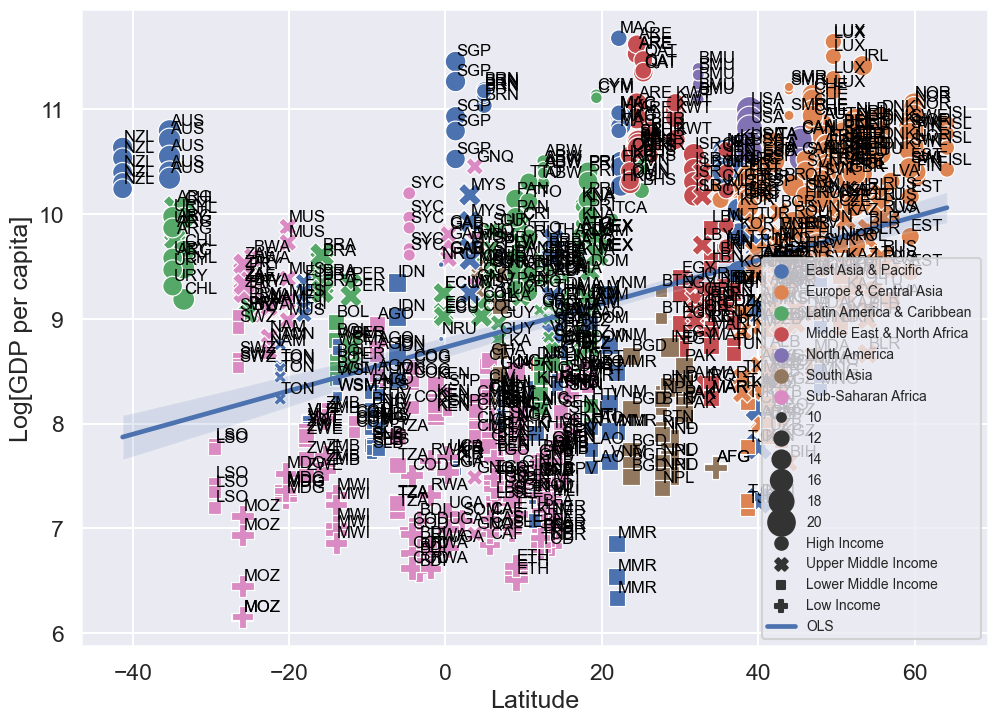

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
pathgraphs = './graphs/'

g = my_xy_plot(E2, 
               x='latitude', 
               y='ln_gdp_pc', 
               xlabel='Latitude', 
               ylabel='Log[GDP per capita]', 
               OLS=True, 
               labels=True, 
               size="ln_pop", 
               sizes=(10, 400), 
               filename='ln-gdp-pc-latitude.pdf')

Exercise 3: Using the my_xy_line_plot function plot the evolution of GDP per capita and total patents by income groups and regions (separate figures).

In [54]:
def my_xy_line_plot(dfin, 
                    x='year', 
                    y='ln_gdp_pc', 
                    labelvar='iso3c', 
                    dx=0.006125, 
                    dy=0.006125, 
                    xlogscale=False, 
                    ylogscale=False,
                    xlabel='Growth Rate of Population', 
                    ylabel='Log[Income per capita]',
                    labels=False,
                    xpct = False,
                    ypct = False,
                    OLS=False,
                    OLSlinelabel='OLS',
                    ssline=False,
                    sslinelabel='45 Degree Line',
                    filename='income-pop-growth.pdf',
                    hue='region',
                    hue_order=['East Asia & Pacific', 'Europe & Central Asia',
                               'Latin America & Caribbean ', 'Middle East & North Africa',
                               'North America', 'South Asia', 'Sub-Saharan Africa '],
                    style='incomeLevel', 
                    style_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
                    palette=None,
                    legend_fontsize=10,
                    label_fontsize=12,
                    loc=None,
                    save=True):
    '''
    Plot the association between x and var in dataframe using labelvar for labels. 
    '''
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_context("talk")
    df = dfin.copy()
    df = df.dropna(subset=[x, y]).reset_index(drop=True)
    # Plot
    k = 0
    fig, ax = plt.subplots()
    sns.lineplot(x=x, y=y, data=df, ax=ax, 
                    hue=hue,
                    hue_order=hue_order,
                    alpha=1, 
                    style=style, 
                    style_order=style_order,
                    palette=palette,
                )
    if OLS:
        sns.regplot(x=x, y=y, data=df, ax=ax, label=OLSlinelabel, scatter=False)
    if ssline:
        ax.plot([df[x].min()*.99, df[x].max()*1.01], [df[x].min()*.99, df[x].max()*1.01], c='r', label=sslinelabel)
    if labels:
        movex = df[x].mean() * dx
        movey = df[y].mean() * dy
        for line in range(0,df.shape[0]):
            ax.text(df[x][line]+movex, df[y][line]+movey, df[labelvar][line], horizontalalignment='left', fontsize=label_fontsize, color='black')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xpct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        xticks = mtick.FormatStrFormatter(fmt)
        ax.xaxis.set_major_formatter(xticks)
    if ypct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        yticks = mtick.FormatStrFormatter(fmt)
        ax.yaxis.set_major_formatter(yticks)
    if ylogscale:
        ax.set(yscale="log")
    if xlogscale:
        ax.set(xscale="log")
    handles, labels = ax.get_legend_handles_labels()
    handles = np.array(handles)
    labels = np.array(labels)
    handles = list(handles[(labels!='region') & (labels!='incomeLevel')])
    labels = list(labels[(labels!='region') & (labels!='incomeLevel')])
    ax.legend(handles=handles, labels=labels, fontsize=legend_fontsize, loc=loc)
    if save:
        plt.savefig(pathgraphs + filename, dpi=300, bbox_inches='tight')
    return fig

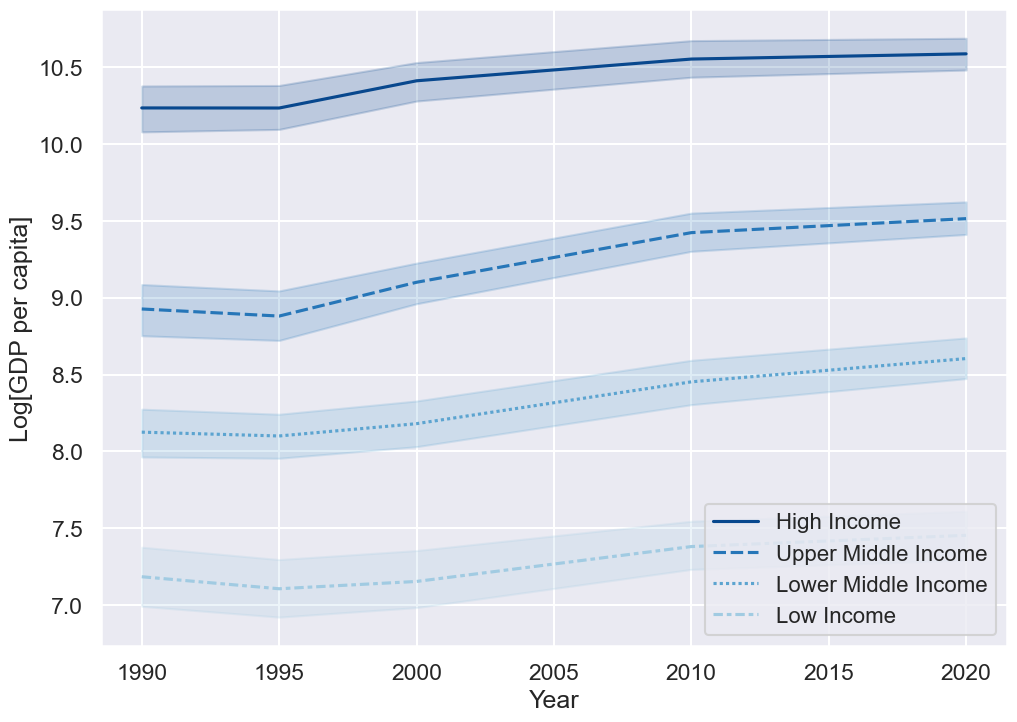

In [55]:
palette=sns.color_palette("Blues_r", E2['incomeLevel'].unique().shape[0]+6)[:E2['incomeLevel'].unique().shape[0]*2:2]
fig = my_xy_line_plot(E2, 
                x='year', 
                y='ln_gdp_pc', 
                xlabel='Year',
                ylabel='Log[GDP per capita]',
                filename='ln-gdp-pc-income-groups-TS.pdf',
                hue='incomeLevel',
                hue_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
                palette=palette,
                OLS=False, 
                labels=False,
                legend_fontsize=16,
                loc='lower right',
                save=True)

Exercise 4: Plot the relation between patenting activity by residents and non-residents in the year 2015. Make sure to show the 45 degree line so you can see how similar they are.

In [61]:
E2 = wdi[wdi['year'] == 2015]
E2 = E2.reset_index()
E2 = E2.drop('index', axis=1)
E2

,iso3c,iso2c,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude,...,NY.GDP.PCAP.PP.KD,NY.GDP.PCAP.KD,SL.GDP.PCAP.EM.KD,SP.POP.GROW,SP.POP.TOTL,SP.DYN.WFRT,SP.DYN.TFRT.IN,gdp_pc,ln_gdp_pc,ln_pop
0,ABW,AW,Aruba,Latin America & Caribbean,,High Income,Not classified,Oranjestad,-70.0167,12.51670,...,36461.846561,28399.050131,NaN,0.541048,104339.0,NaN,1.854,36461.846561,10.504022,11.555400
1,AFG,AF,Afghanistan,South Asia,South Asia,Low Income,IDA,Kabul,69.1761,34.52280,...,2068.265904,556.007221,8950.394497,3.077054,34413603.0,4.4,4.976,2068.265904,7.634466,17.353962
2,AGO,AO,Angola,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower Middle Income,IBRD,Luanda,13.2420,-8.81155,...,8036.631076,3127.890598,21222.235803,3.438869,27884380.0,NaN,5.774,8036.631076,8.991765,17.143577
3,ALB,AL,Albania,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper Middle Income,IBRD,Tirane,19.8172,41.33170,...,11878.454448,3952.802538,31777.707846,-0.291206,2880703.0,NaN,1.677,11878.454448,9.382481,14.873545
4,AND,AD,Andorra,Europe & Central Asia,,High Income,Not classified,Andorra la Vella,1.5218,42.50750,...,NaN,35770.918653,NaN,-1.552135,77993.0,NaN,NaN,NaN,NaN,11.264374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,XKX,XK,Kosovo,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper Middle Income,IDA,Pristina,20.9260,42.56500,...,9445.105476,3520.766449,NaN,-1.364932,1788196.0,NaN,2.090,9445.105476,9.153252,14.396718
213,YEM,YE,"Yemen, Rep.",Middle East & North Africa,Middle East & North Africa (excluding high inc...,Low Income,IDA,Sana'a,44.2075,15.35200,...,NaN,1601.807163,NaN,2.578030,26497881.0,NaN,4.103,NaN,NaN,17.092575
214,ZAF,ZA,South Africa,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Upper Middle Income,IBRD,Pretoria,28.1871,-25.74600,...,14010.104418,6259.839681,48490.701443,1.532243,55386369.0,NaN,2.484,14010.104418,9.547534,17.829844
215,ZMB,ZM,Zambia,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Low Income,IDA,Lusaka,28.2937,-15.39820,...,3443.553254,1338.290927,9566.033479,3.066671,15879370.0,NaN,4.918,3443.553254,8.144259,16.580531


In [62]:
def my_xy_plot(dfin, 
               x='SP.POP.GROW', 
               y='ln_gdp_pc', 
               labelvar='iso3c', 
               dx=0.006125, 
               dy=0.006125, 
               xlogscale=False, 
               ylogscale=False,
               xlabel='Growth Rate of Population', 
               ylabel='Log[Income per capita in 2015]',
               labels=False,
               xpct = False,
               ypct = False,
               OLS=False,
               OLSlinelabel='OLS',
               ssline=False,
               sslinelabel='45 Degree Line',
               filename='income-pop-growth.pdf',
               hue='region',
               hue_order=['East Asia & Pacific', 'Europe & Central Asia',
                          'Latin America & Caribbean ', 'Middle East & North Africa',
                          'North America', 'South Asia', 'Sub-Saharan Africa '],
               style='incomeLevel', 
               style_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
               palette=None,
               size=None,
               sizes=None,
               legend_fontsize=10,
               label_font_size=12,
               save=True):
    '''
    Plot the association between x and var in dataframe using labelvar for labels.
    '''
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_context("talk")
    df = dfin.copy()
    df = df.dropna(subset=[x, y]).reset_index(drop=True)
    # Plot
    k = 0
    fig, ax = plt.subplots()
    sns.scatterplot(x=x, y=y, data=df, ax=ax, 
                    hue=hue,
                    hue_order=hue_order,
                    #hue='incomeLevel',
                    #hue_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
                    #hue_order=['East Asia & Pacific', 'Europe & Central Asia',
                    #           'Latin America & Caribbean ', 'Middle East & North Africa',
                    #           'North America', 'South Asia', 'Sub-Saharan Africa '],
                    alpha=1, 
                    style=style, 
                    style_order=style_order,
                    palette=palette,
                    size=size,
                    sizes=sizes,
                    #palette=sns.color_palette("Blues_r", df[hue].unique().shape[0]+6)[:df[hue].unique().shape[0]*2:2],
                )
    if OLS:
        sns.regplot(x=x, y=y, data=df, ax=ax, label=OLSlinelabel, scatter=False)
    if ssline:
        ax.plot([df[x].min()*.99, df[x].max()*1.01], [df[x].min()*.99, df[x].max()*1.01], c='r', label=sslinelabel)
    if labels:
        movex = df[x].mean() * dx
        movey = df[y].mean() * dy
        for line in range(0,df.shape[0]):
            ax.text(df[x][line]+movex, df[y][line]+movey, df[labelvar][line], horizontalalignment='left', fontsize=label_font_size, color='black')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xpct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        xticks = mtick.FormatStrFormatter(fmt)
        ax.xaxis.set_major_formatter(xticks)
    if ypct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        yticks = mtick.FormatStrFormatter(fmt)
        ax.yaxis.set_major_formatter(yticks)
    if ylogscale:
        ax.set(yscale="log")
    if xlogscale:
        ax.set(xscale="log")
    handles, labels = ax.get_legend_handles_labels()
    handles = np.array(handles)
    labels = np.array(labels)
    handles = list(handles[(labels!=hue) & (labels!=style) & (labels!=size)])
    labels = list(labels[(labels!=hue) & (labels!=style) & (labels!=size)])
    ax.legend(handles=handles, labels=labels, fontsize=legend_fontsize)
    if save:
        plt.savefig(pathgraphs + filename, dpi=300, bbox_inches='tight')
    return fig

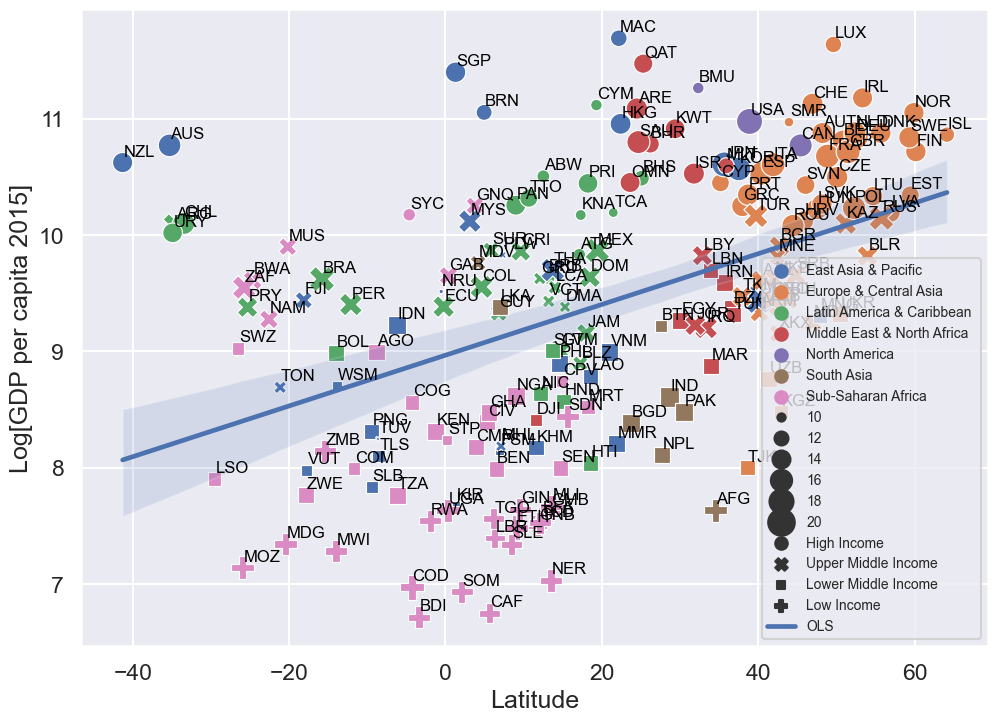

In [63]:
g = my_xy_plot(E2, 
               x='latitude', 
               y='ln_gdp_pc', 
               xlabel='Latitude', 
               ylabel='Log[GDP per capita 2015]', 
               OLS=True, 
               labels=True, 
               size="ln_pop", 
               sizes=(10, 400), 
               filename='ln-gdp-pc-latitude.pdf')

Exercise 5: Create a static and a dynamic map for patenting activity in the year 2015 across the world.

Text(0.5, 1.0, 'WGS84 (lat/lon)')

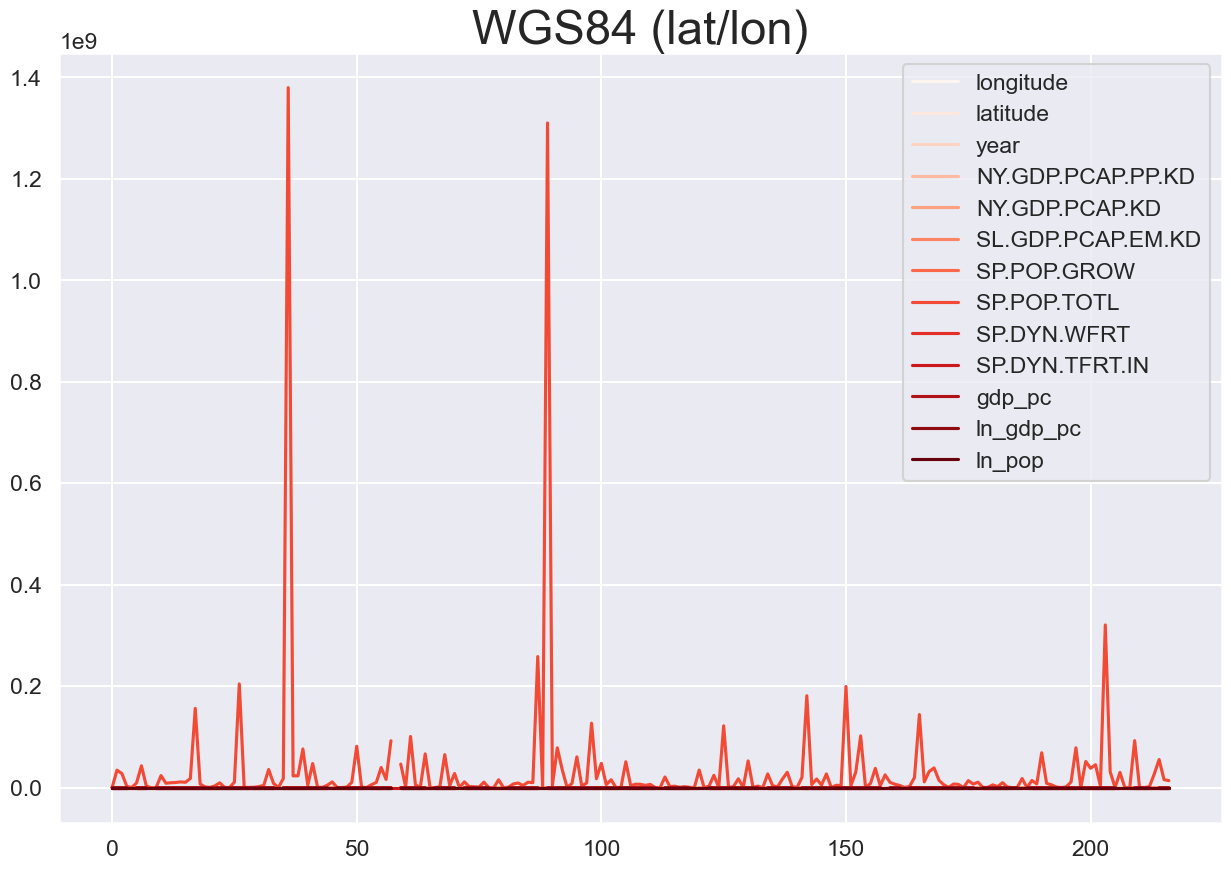

In [87]:
fig, ax = plt.subplots(figsize=(15,10))
E2.plot(column='gdp_pc', ax=ax, cmap='Reds')
ax.set_title("WGS84 (lat/lon)", fontdict={'fontsize':34})

Exercise 6: Explore the relation between economic development as measured by Log[GDP per capita] and patenting activity. Show the relation for residents, non-residents, and total, all in one nice looking table. Also, produce a few nice looking figures.

In [79]:
E2


,iso3c,iso2c,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude,...,NY.GDP.PCAP.PP.KD,NY.GDP.PCAP.KD,SL.GDP.PCAP.EM.KD,SP.POP.GROW,SP.POP.TOTL,SP.DYN.WFRT,SP.DYN.TFRT.IN,gdp_pc,ln_gdp_pc,ln_pop
0,ABW,AW,Aruba,Latin America & Caribbean,,High Income,Not classified,Oranjestad,-70.0167,12.51670,...,36461.846561,28399.050131,NaN,0.541048,104339.0,NaN,1.854,36461.846561,10.504022,11.555400
1,AFG,AF,Afghanistan,South Asia,South Asia,Low Income,IDA,Kabul,69.1761,34.52280,...,2068.265904,556.007221,8950.394497,3.077054,34413603.0,4.4,4.976,2068.265904,7.634466,17.353962
2,AGO,AO,Angola,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower Middle Income,IBRD,Luanda,13.2420,-8.81155,...,8036.631076,3127.890598,21222.235803,3.438869,27884380.0,NaN,5.774,8036.631076,8.991765,17.143577
3,ALB,AL,Albania,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper Middle Income,IBRD,Tirane,19.8172,41.33170,...,11878.454448,3952.802538,31777.707846,-0.291206,2880703.0,NaN,1.677,11878.454448,9.382481,14.873545
4,AND,AD,Andorra,Europe & Central Asia,,High Income,Not classified,Andorra la Vella,1.5218,42.50750,...,NaN,35770.918653,NaN,-1.552135,77993.0,NaN,NaN,NaN,NaN,11.264374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,XKX,XK,Kosovo,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper Middle Income,IDA,Pristina,20.9260,42.56500,...,9445.105476,3520.766449,NaN,-1.364932,1788196.0,NaN,2.090,9445.105476,9.153252,14.396718
213,YEM,YE,"Yemen, Rep.",Middle East & North Africa,Middle East & North Africa (excluding high inc...,Low Income,IDA,Sana'a,44.2075,15.35200,...,NaN,1601.807163,NaN,2.578030,26497881.0,NaN,4.103,NaN,NaN,17.092575
214,ZAF,ZA,South Africa,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Upper Middle Income,IBRD,Pretoria,28.1871,-25.74600,...,14010.104418,6259.839681,48490.701443,1.532243,55386369.0,NaN,2.484,14010.104418,9.547534,17.829844
215,ZMB,ZM,Zambia,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Low Income,IDA,Lusaka,28.2937,-15.39820,...,3443.553254,1338.290927,9566.033479,3.066671,15879370.0,NaN,4.918,3443.553254,8.144259,16.580531


<AxesSubplot: xlabel='ln_gdp_pc', ylabel='NY.GDP.PCAP.PP.KD'>

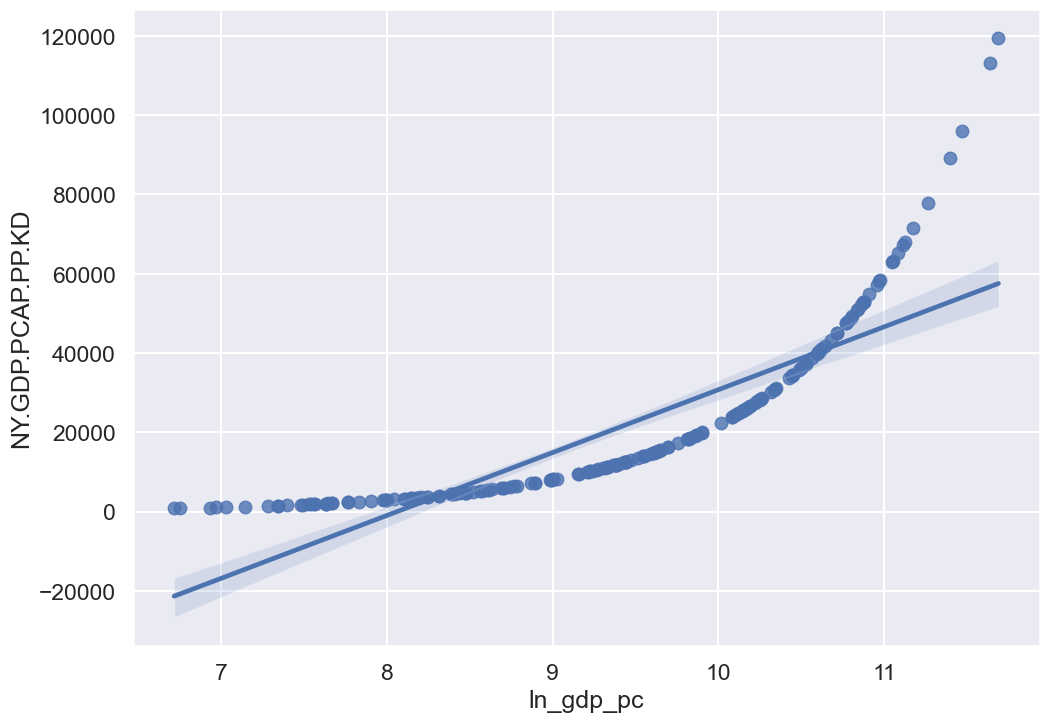

In [81]:
import seaborn as sns
sns.regplot(x="ln_gdp_pc", y="NY.GDP.PCAP.PP.KD", data=E2)

<AxesSubplot: xlabel='gdp_pc', ylabel='NY.GDP.PCAP.PP.KD'>

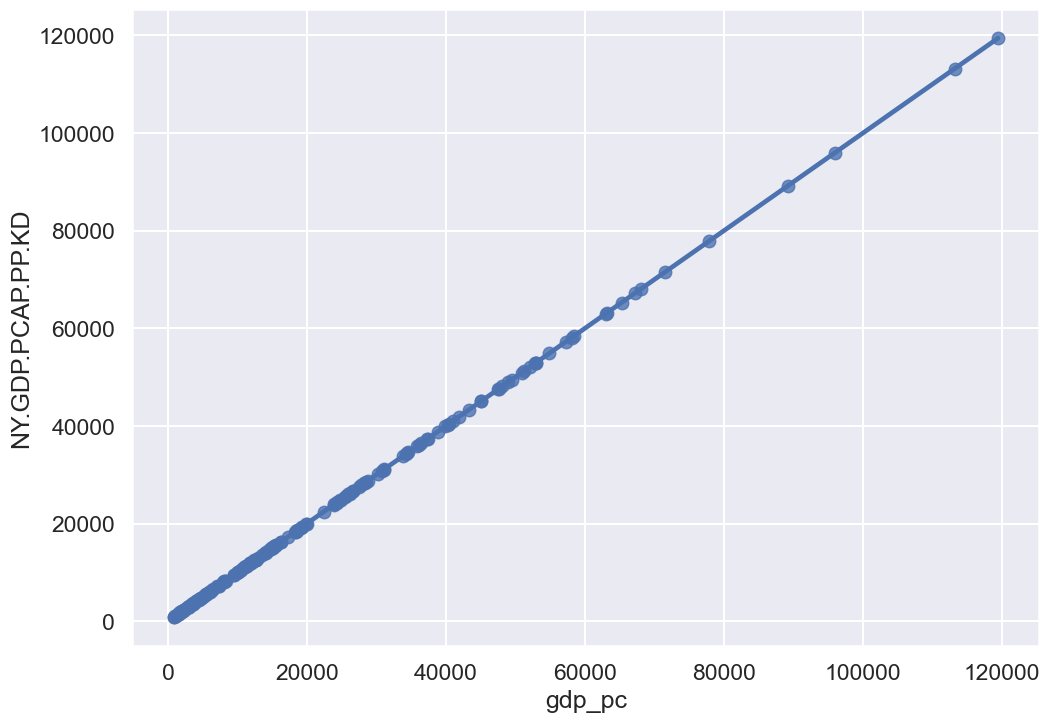

In [82]:
sns.regplot(x="gdp_pc", y="NY.GDP.PCAP.PP.KD", data=E2)